                                             Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

# 1. Read and visualise the data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [145]:
# read the dataset
df = pd.read_csv('C:\\My data\\Upgrad2\\Clusering assignment\\Country-data.csv')

In [146]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [147]:
df.country.value_counts()

Dominican Republic    1
Nepal                 1
Tanzania              1
Bahamas               1
Malawi                1
                     ..
Uruguay               1
Congo, Rep.           1
Romania               1
Montenegro            1
Ireland               1
Name: country, Length: 167, dtype: int64

In [148]:
# basics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### There are 167 rows and 10 columns in dataset.Datatype is looking fine.

In [149]:
# Checking the missing values presence
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### No missing data present 

In [150]:
# looking at the statistical aspects of the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [151]:
# checking Outliers

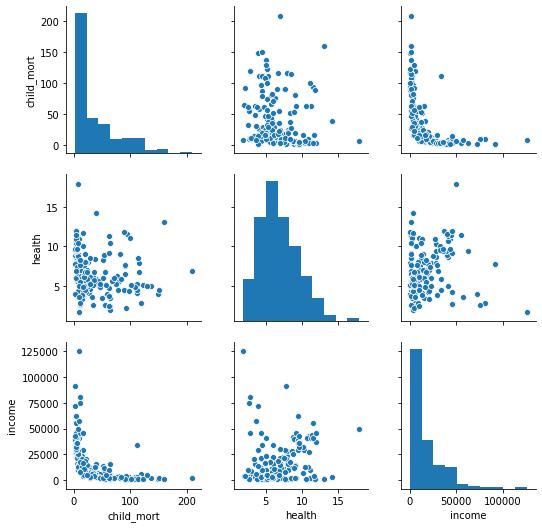

In [152]:
sns.pairplot(df[['child_mort','health', 'income']])

### Observation : 
#### Child mortality (i.e. Death of children under 5 years of age per 1000 live births) is high for low income people.These people also spending high on health even though they have less income and sucn things will further attract poverty.

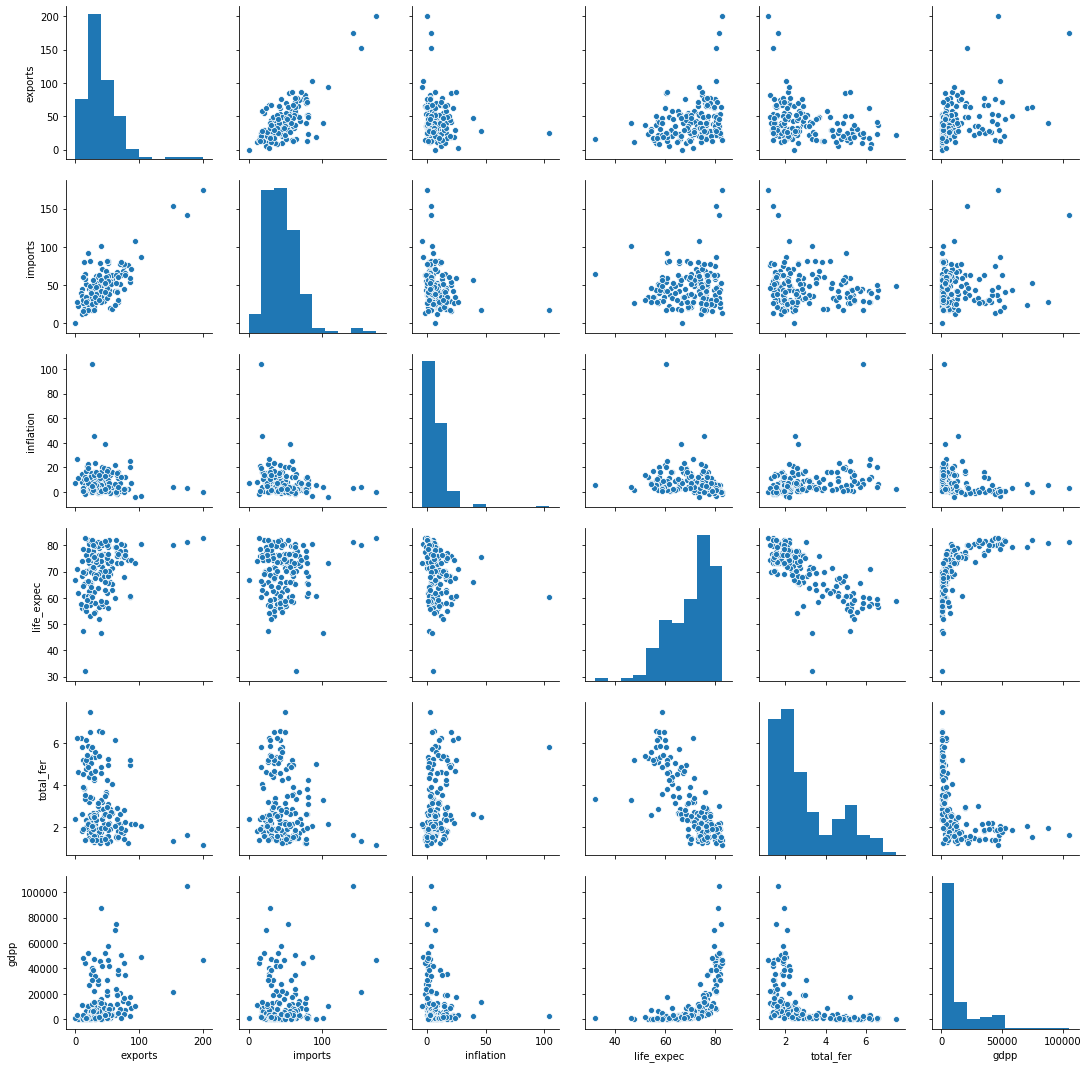

In [153]:
sns.pairplot(df[['exports', 'imports','inflation', 'life_expec', 'total_fer', 'gdpp']])

### Observations:
#### 1.Import and export of counties are directly propotional 
#### 2.Countries with higher GDP is also exporting more.
#### 3.Life expectancy is higher for high income country.

# Outliers Analysis

In [154]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


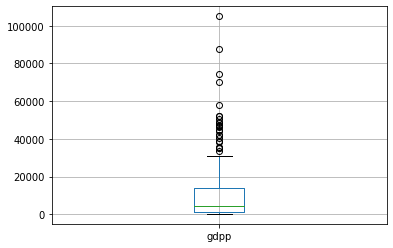

In [155]:
df.boxplot(['gdpp'])
plt.show()

gdpp > 20000 is surely outliers here as per the box plot results. We need to remove for optimum clustering.

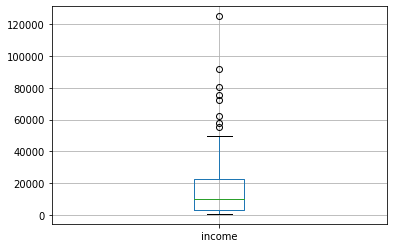

In [156]:
df.boxplot(['income'])
plt.show()

#### Most people ie 75 % of population on average have income around 20000. However, few people have exectionally high income around 120000.Income with > 60K, can be categorised as high income group.However, we will treat these as outliers for optimum clustering.

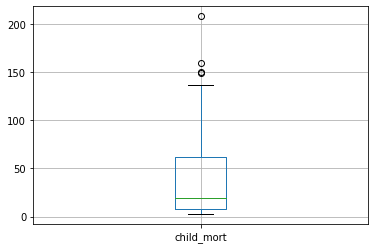

In [157]:
df.boxplot(['child_mort'])
plt.show()

####  Here also, outliers exist and outlier treament required for optimum clustering.

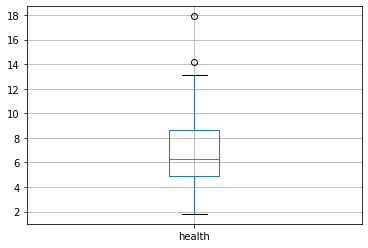

In [158]:
df.boxplot(['health'])
plt.show()

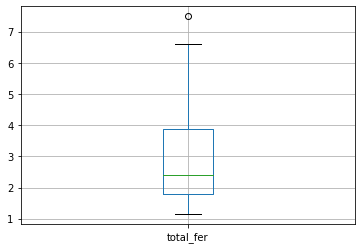

In [159]:
df.boxplot(['total_fer'])
plt.show()

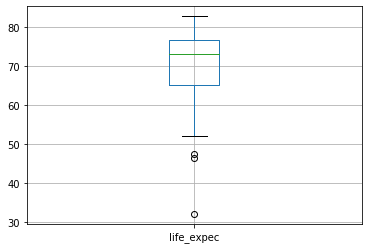

In [160]:
df.boxplot(['life_expec'])
plt.show()

### Here also, outliers exist and outlier treament required for optimum clustering.


# 2. Prepare the data for modelling

In [161]:
# removing (statistical) outliers
# outlier treatment for child_mort
Q1 = df.child_mort.quantile(0.05)
Q3 = df.child_mort.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.child_mort >= Q1 - 1.5*IQR) & (df.child_mort <= Q3 + 1.5*IQR)]

# outlier treatment for income
Q1 = df.income.quantile(0.05)
Q3 = df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.income >= Q1 - 1.5*IQR) & (df.income <= Q3 + 1.5*IQR)]

# outlier treatment for gdpp
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.gdpp >= Q1 - 1.5*IQR) & (df.gdpp <= Q3 + 1.5*IQR)]

# outlier treatment for health
Q1 = df.health.quantile(0.05)
Q3 = df.health.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.health >= Q1 - 1.5*IQR) & (df.health <= Q3 + 1.5*IQR)]

# outlier treatment for total_fer
Q1 = df.total_fer.quantile(0.05)
Q3 = df.total_fer.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.total_fer >= Q1 - 1.5*IQR) & (df.total_fer <= Q3 + 1.5*IQR)]

# outlier treatment for exports
Q1 = df.exports.quantile(0.05)
Q3 = df.exports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.exports >= Q1 - 1.5*IQR) & (df.exports <= Q3 + 1.5*IQR)]

In [162]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.319876,-0.217840,-0.114003,-0.557737,0.285586,-0.886196,0.847413,-0.480841
exports,-0.319876,1.000000,-0.078497,0.688296,0.501510,-0.091020,0.298497,-0.311050,0.396930
health,-0.217840,-0.078497,1.000000,0.132113,0.243891,-0.264948,0.235764,-0.214691,0.414648
imports,-0.114003,0.688296,0.132113,1.000000,0.079514,-0.246484,0.018413,-0.137616,0.085547
income,-0.557737,0.501510,0.243891,0.079514,1.000000,-0.151947,0.641042,-0.532087,0.905558
inflation,0.285586,-0.091020,-0.264948,-0.246484,-0.151947,1.000000,-0.235550,0.313502,-0.221276
life_expec,-0.886196,0.298497,0.235764,0.018413,0.641042,-0.235550,1.000000,-0.758120,0.594972
total_fer,0.847413,-0.311050,-0.214691,-0.137616,-0.532087,0.313502,-0.758120,1.000000,-0.451300
gdpp,-0.480841,0.396930,0.414648,0.085547,0.905558,-0.221276,0.594972,-0.451300,1.000000


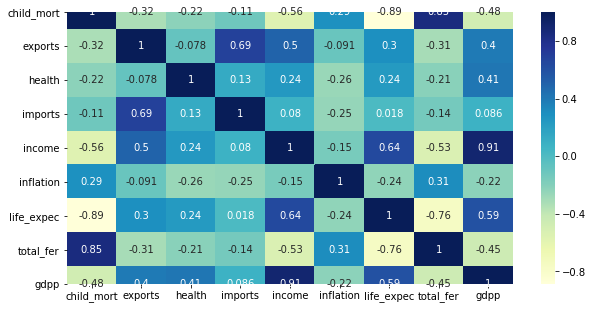

In [163]:
#Checking overall correlation between different variables to understand the data further
plt.figure(figsize = [10,5])
sns.heatmap(data =df.corr(), annot = True , cmap = "YlGnBu" )
plt.show()

####  1. child_mort is highly correlated with total_fer meaning that countries with higher children borning also have high death rate.
####  2. High income country have higher gdpp as expected.

# 3. Standarization

In [164]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [165]:
sc = StandardScaler()
df_scale = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
df_scaled =sc.fit_transform(df_scale)


In [166]:
df_scaled = pd.DataFrame(df_scaled)

In [167]:
type(df_scaled)

pandas.core.frame.DataFrame

In [168]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.279156,-1.226432,0.263678,-0.061548,-0.863084,0.151714,-1.609209,1.890857,-0.672624
1,-0.547586,-0.491004,-0.115283,0.105925,-0.369485,-0.315936,0.664152,-0.870129,-0.472025
2,-0.282014,-0.066089,-0.990940,-0.672597,-0.193284,0.780915,0.686772,-0.049116,-0.451040
3,1.993968,0.910396,-1.476599,-0.152074,-0.608572,1.376105,-1.168109,2.115973,-0.503785
4,-0.703952,0.223996,-0.306603,0.572133,0.174542,-0.604084,0.720703,-0.552318,-0.012070


In [169]:
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

In [170]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.279156,-1.226432,0.263678,-0.061548,-0.863084,0.151714,-1.609209,1.890857,-0.672624
1,-0.547586,-0.491004,-0.115283,0.105925,-0.369485,-0.315936,0.664152,-0.870129,-0.472025
2,-0.282014,-0.066089,-0.990940,-0.672597,-0.193284,0.780915,0.686772,-0.049116,-0.451040
3,1.993968,0.910396,-1.476599,-0.152074,-0.608572,1.376105,-1.168109,2.115973,-0.503785
4,-0.703952,0.223996,-0.306603,0.572133,0.174542,-0.604084,0.720703,-0.552318,-0.012070


# 4. Lets check whether data has clustering tendency or not.For this we will check Hopkins statitics.

In [171]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [172]:
hopkins(df_scaled)

0.818201803158561

#### Hopkins value of 0.81 indictaes that data has natural clustering tendency

# 5. Modelling with KMeans clustering algorithm

In [173]:
# KMeans clusering with arbitary value  of k as 4
kmeans = KMeans(n_clusters= 4 ,max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [174]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2,
       1, 3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 3,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2, 1,
       2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       3, 3, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       3, 3, 1, 2, 3, 3, 1, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2])

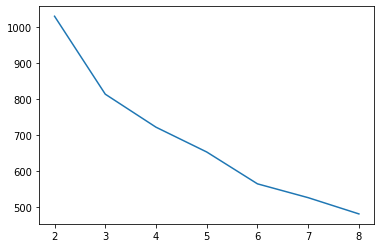

In [175]:
# Lets find the optimal value of k ie number of cluster with elbow/SSD method
ssd = []
num_clusters = [2,3,4,5,6,7,8]
for i in num_clusters:
    kmeans = KMeans(n_clusters= i ,max_iter=50)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(num_clusters,ssd) # plot the ssd v/s K 
plt.show()

### looks like k = 3  would be feasible.Lets now go deeper with Silhouette analysis

In [176]:
# Silhouette analysis before outlier treament
num_clusters = [2,3,4,5,6,7,8]
for i in num_clusters:
    kmeans =  KMeans(n_clusters=i, max_iter = 50)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    Silhouette_avg = silhouette_score(df_scaled , cluster_labels)
    print('Silhouette_avg for no of clusters {0} is {1}'.format(i,Silhouette_avg))
    



Silhouette_avg for no of clusters 2 is 0.2862668898276749
Silhouette_avg for no of clusters 3 is 0.28503392230415703
Silhouette_avg for no of clusters 4 is 0.29245041808691735
Silhouette_avg for no of clusters 5 is 0.22267855686192298
Silhouette_avg for no of clusters 6 is 0.25433945725228146
Silhouette_avg for no of clusters 7 is 0.2038781128953312
Silhouette_avg for no of clusters 8 is 0.24662678972279298


# Silhouette values without Outlier treatment
#Silhouette_avg for no of clusters 2 is 0.28735668921406704
#Silhouette_avg for no of clusters 3 is 0.28329575683463126
#Silhouette_avg for no of clusters 4 is 0.28310534223092415
#Silhouette_avg for no of clusters 5 is 0.3064507657886972
#Silhouette_avg for no of clusters 6 is 0.23057357437984738
#Silhouette_avg for no of clusters 7 is 0.24589663501966255
#Silhouette_avg for no of clusters 8 is 0.2234080917981224

In [177]:
# Silhouette analysis after outlier treament
num_clusters = [2,3,4,5,6,7,8]
for i in num_clusters:
    kmeans =  KMeans(n_clusters=i, max_iter = 50)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    Silhouette_avg = silhouette_score(df_scaled , cluster_labels)
    print('Silhouette_avg for no of clusters {0} is {1}'.format(i,Silhouette_avg))
    

Silhouette_avg for no of clusters 2 is 0.2862668898276749
Silhouette_avg for no of clusters 3 is 0.28503392230415703
Silhouette_avg for no of clusters 4 is 0.2855111313689248
Silhouette_avg for no of clusters 5 is 0.22167126593191427
Silhouette_avg for no of clusters 6 is 0.22812715657943242
Silhouette_avg for no of clusters 7 is 0.23309974699165167
Silhouette_avg for no of clusters 8 is 0.21823316054092975


### As per the Silhouette score stats though not encouraging(should have value >0.7), we will go with k =3.

In [178]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.279156,-1.226432,0.263678,-0.061548,-0.863084,0.151714,-1.609209,1.890857,-0.672624
1,-0.547586,-0.491004,-0.115283,0.105925,-0.369485,-0.315936,0.664152,-0.870129,-0.472025
2,-0.282014,-0.066089,-0.990940,-0.672597,-0.193284,0.780915,0.686772,-0.049116,-0.451040
3,1.993968,0.910396,-1.476599,-0.152074,-0.608572,1.376105,-1.168109,2.115973,-0.503785
4,-0.703952,0.223996,-0.306603,0.572133,0.174542,-0.604084,0.720703,-0.552318,-0.012070


In [179]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [180]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [181]:
#Assign the label
df['Cluster_Num'] = kmeans.labels_

In [182]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


# 6. Modelling with Hierarchical clustering algorithm

In [183]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.279156,-1.226432,0.263678,-0.061548,-0.863084,0.151714,-1.609209,1.890857,-0.672624
1,-0.547586,-0.491004,-0.115283,0.105925,-0.369485,-0.315936,0.664152,-0.870129,-0.472025
2,-0.282014,-0.066089,-0.990940,-0.672597,-0.193284,0.780915,0.686772,-0.049116,-0.451040
3,1.993968,0.910396,-1.476599,-0.152074,-0.608572,1.376105,-1.168109,2.115973,-0.503785
4,-0.703952,0.223996,-0.306603,0.572133,0.174542,-0.604084,0.720703,-0.552318,-0.012070


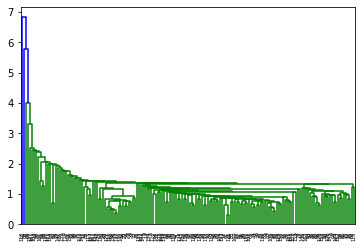

In [184]:
#single linkage
mergings = linkage(df_scaled , method = 'single' ,metric='euclidean')
dendrogram(mergings)
plt.show()

### We can see here that single linkage method is not suitable here. There is no any clear bouldary between clusters.So, we will not go with single linkage method.

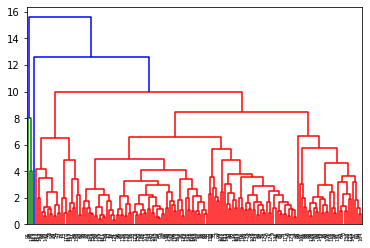

In [185]:
#Complete linkage
mergings = linkage(df_scaled , method = 'complete',metric= 'euclidean')
dendrogram(mergings)
plt.show()

### As per the dendrogram obtained with complete linkage method , there is clear cluster formation and at k = 3 ( height nearly at 8),we get 3 clusters. This result is matching wiith KMeans clustering.So, finally we decide to go with k =3.

In [186]:
# 3 Clusters
Cluster_labels = cut_tree(mergings , n_clusters =3).reshape(-1, )
Cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [187]:
# assigning clusters
df['Cluster_hier'] = Cluster_labels

In [188]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


                                            ******
### Note : Cluters formed with KMeans clustering is named as "Cluster_Num" & clusters formed with Hierarchical clustering is named as "Cluster_hier".Both are having 3 clusters named as 0,1 & 2.
                                            ******

# Visualization of clusters

### visualizing clusters obtained from KMeans

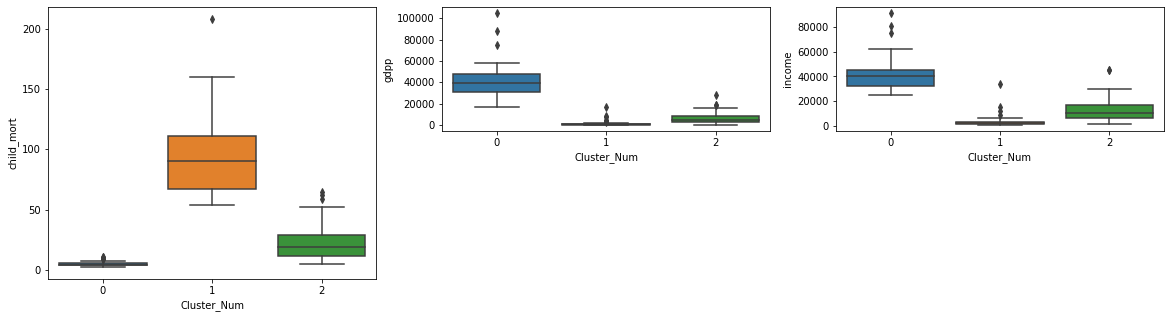

In [189]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Cluster_Num' , y = 'child_mort' , data = df )
plt.subplot(2,3,2)
sns.boxplot(x = 'Cluster_Num' , y = 'gdpp' , data =df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Cluster_Num' , y = 'income' , data = df)
plt.show()

                                                    *****
### As per visualizations obtained for KMeans : 
### cluster 1 is belonging to coutries which are dire need of aid.Here , Child_mort is highest , gdpp & income both are at lowest  
### Thus, 
### Cluster 1 => Undeleveloped countries
### Cluster 0 => Most developed countries.Here, child_mort is lowest and gdpp & income both are at top which is a sign of developed coutries.
### Cluster 2 => This can be categorised as developing coutries or less developed coutries.Her both these parameters are at at moderate levels.

### visualizing clusters obtained from Hierarchical clustering algorithm

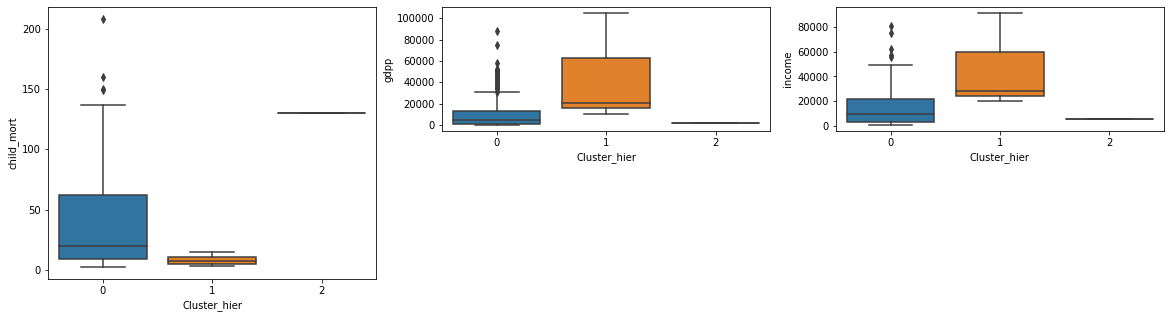

In [190]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Cluster_hier' , y = 'child_mort' , data = df )
plt.subplot(2,3,2)
sns.boxplot(x = 'Cluster_hier' , y = 'gdpp' , data =df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Cluster_hier' , y = 'income' , data = df)
plt.show()

### Clustering with hierachical algorithm showing that cluster 2 belonging to most undeveloped coutries and are most dire need of aid.

#### Visualization of coutries which are in most dire need of aid : kmeans custering

In [191]:
df_cluster0 = df[df['Cluster_Num'] == 0] # developing countries 

In [192]:
df_cluster1 = df[df['Cluster_Num'] == 1] # Most undeloped coutries

In [193]:
df_cluster2 = df[df['Cluster_Num'] == 2] # Most developed countries

In [194]:
df_cluster1.sort_values(by = ['child_mort','health'],ascending = False).head(10) # sorting for top 5 most poor coutries based on child_mort','health 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1,0


In [195]:
df_cluster1.sort_values(['income'],ascending = True).head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


In [196]:
df_cluster1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0


In [197]:
# Dataframe of 5 most undeveloped countries which are in dire need of aid.coutries selected based on above sorting
df_dire_need = df_cluster1[df_cluster1['country'].isin(['Sierra Leone','Niger','Central African Republic','Congo, Dem. Rep.','Haiti'])]

In [198]:
df_dire_need.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


#### Visualization of clusters formed with KMeans with parameters 'child_mort' & 'income'

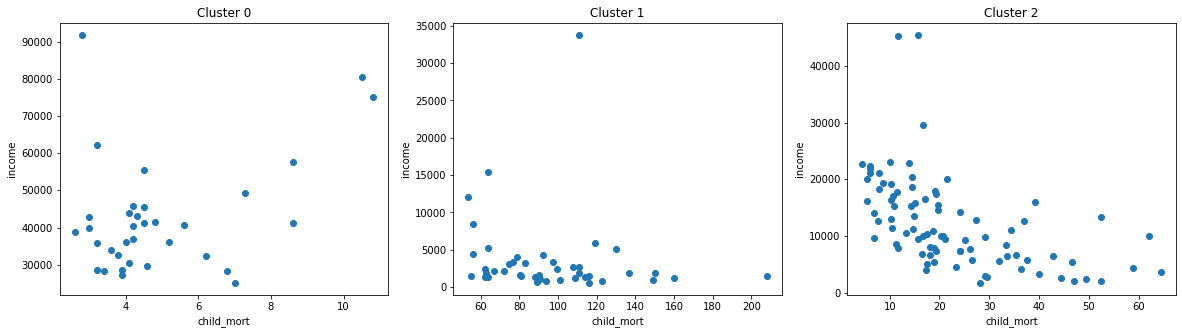

In [199]:

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title("Cluster 0")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(df_cluster0.child_mort,df_cluster0.income)
plt.subplot(1,3,2)
plt.title("Cluster 1")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(df_cluster1.child_mort,df_cluster1.income)
plt.subplot(1,3,3)
plt.title("Cluster 2")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(df_cluster2.child_mort,df_cluster2.income)
plt.show()

                                                    ***
### We can see here that cluster1 is having coutries with lowest income.Clusert 2 have many countries with high income.
                                                    ***

#### Visualization of coutries which are in most dire need of aid : Hierarchical custering

In [200]:
Cluster_h0 = df[df['Cluster_hier'] == 0]


In [201]:
Cluster_h1 = df[df['Cluster_hier'] == 1]

In [202]:
Cluster_h2 = df[df['Cluster_hier'] == 2] # most need of aid 

In [203]:
Cluster_h2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,1,2


#### Only one country 'Nigeria' belonging to most undeveloped country as per clustering done by Hierarchical algorithm. We already taken this coutry as most needed for aid as per KMeans.

In [204]:
Cluster_h1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,0,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,0,1
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.21,73.4,2.17,10800,2,1


#### Visualization of clusters formed with KMeans with parameters 'child_mort' & 'income'

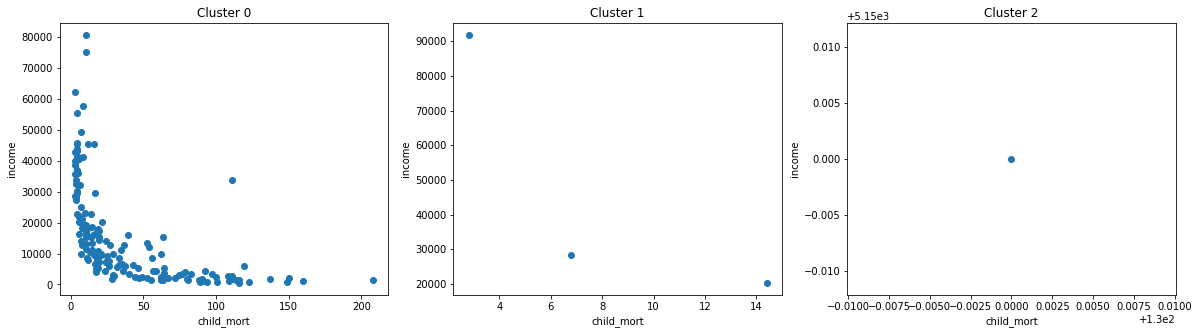

In [205]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title("Cluster 0")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(Cluster_h0.child_mort,Cluster_h0.income)
plt.subplot(1,3,2)
plt.title("Cluster 1")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(Cluster_h1.child_mort,Cluster_h1.income)
plt.subplot(1,3,3)
plt.title("Cluster 2")
plt.xlabel("child_mort")
plt.ylabel("income")
plt.scatter(Cluster_h2.child_mort,Cluster_h2.income)
plt.show()

#### So, Here can can see that Hierarchical clustering is not giving useful result and most of the coutries and just clustered in one cluster 0.

# CONCLUSION

In [209]:
#COUNTRIES WHICH ARE DIREST NEED OF AID ARE FOLLOWS:


In [207]:
df_dire_need.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Num,Cluster_hier
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


In [208]:
countries_direst_need = df_dire_need.iloc[:,:1]
countries_direst_need

,country
31,Central African Republic
37,"Congo, Dem. Rep."
66,Haiti
112,Niger
132,Sierra Leone
